# Bayes Theorem

Goals:
* Grasp how the mathematics of probability can be used to do statistical inference.
* Start working through real inference problems, with pencil, paper, and PGMs.

In [1]:
exec(open('../code/bayes_theorem.py').read()) # see code here for later demos
%matplotlib inline

## References

* Gelman ch. 1
* Ivezic 5.1-5.3
* MacKay 2.3

### Sampling distributions and likelihoods
You've just been introduced to PGMs - these are a visual representation of how data are generated.
* By filling in the blanks, we can write down a **likelihood function** (a function of model parameters), which says how probable a given data set is.
* Properly normalized, the same expression encodes the distribution from which data are generated for fixed parameters, called the **sampling distribution**, $P(\mathrm{data}|\mathrm{params})$.

### Sampling distributions and likelihoods
*Insert example PGM from the previous lesson to illustrate*

### Other ingredients for principled inference

$P($data|params$)$ clearly has a role to play in inferring which parameter values are consistent with the data. What else do we need?

### Other ingredients for principled inference

$P($data|params$)$ clearly has a role to play in inferring which parameter values are consistent with the data. What else do we need?

* $P($params$)$, the **prior distribution**
* $P($params|data$)$, the **posterior distribution**

### The prior distribution

$P($params$)$
* The *marginal* probability of a set of parameter values (integrated over possible data sets).
* Consequently, *independent of the measured data*.
* Interpretation: what we know about the model parameters *before* incorporating new knowledge in the form of the measured data.

### The posterior distribution

$P($params|data$)$
* The probability of a model *given* the measured data.
* Interpretation: what we know about the model parameters *after* incorporating new knowledge in the form of the measured data. In other words, the product of statistical inference.

## Bayes Theorem
The ingredients above are all related through the definition of conditional probability

$P(\mathrm{params}|\mathrm{data}) = \frac{P(\mathrm{data}|\mathrm{params})~P(\mathrm{params})}{P(\mathrm{data})}$

## Bayes Theorem

 $P(\mathrm{params}|\mathrm{data}) = \frac{P(\mathrm{data}|\mathrm{params})~P(\mathrm{params})}{P(\mathrm{data})}$

* $P(\mathrm{params})$: prior - what we know before doing the experiment
* $P(\mathrm{data}|\mathrm{params})$: sampling distribution - probability of obtaining our data set
* $P(\mathrm{params}|\mathrm{data})$: posterior - what we know after doing the experiment ("the answer")
* $P(\mathrm{data})$???: **evidence** - marginal probability of obtaining our data for any parameter values (more on this later)

## Example: measuring the flux of a source

Say we want to measure the flux of a galaxy. In a given integration time, $T$, the number of counts, $N$, that we collect in our fancy CCD will be Poisson distributed

$N|\mu \sim \mathrm{Poisson}(\mu)$

where $\mu=FAT$ is the average number of counts we would expect in time $T$, the product of the integration time, the source flux ($F$, counts per unit time and area), and the collecting area of our telescope ($A$).

Presumably we know $A$ and $T$ well, so for convenience we can make $\mu$ rather than $F$ the free parameter of our model.

### Example: measuring the flux of a source

$N|\mu \sim \mathrm{Poisson}(\mu)$

<table>
    <tr>
        <td><img src="../graphics/bayes_poissoneg_likelihood.png" width=100%></td>
    </tr>
</table>

### Example: measuring the flux of a source

We'll get to the prior next...

<table>
    <tr>
        <td><img src="../graphics/bayes_poissoneg_pgm0.png" width=100%></td>
    </tr>
</table>

### Example: measuring the flux of a source

We'll talk more about how to choose a prior in a few minutes. For now, we'll make a common choice, the uniform distribution (for $\mu\geq0$ in this case).
* This is an **improper** distribution, i.e. one that can't technically be normalized. This doesn't necessarily matter, as long as the posterior distribution turns out to be proper.

### Example: measuring the flux of a source

$\mu \sim \mathrm{Uniform}(0,\infty)$

<table>
    <tr>
        <td><img src="../graphics/bayes_poissoneg_prior.png" width=100%></td>
    </tr>
</table>

### Example: measuring the flux of a source

What about the evidence, $P(N)$?
* This is constant with respect to model parameters by definition, so we don't actually need to calculate it (although we could, by marginalizing the sampling distribution over $\mu$).
* That's because we know the posterior will be a probability distribution - as long as it's proper, the normalizing constant must be whatever makes it integrate to 1.

### Example: measuring the flux of a source

Now we have everything we need to calculate $P(\mu|N)\propto P(N|\mu)P(\mu)$.
* In a sense we're done, and could simply evaluate this for all possible $\mu$s, but it would be nice to have a simpler form for the result.

### Aside: [conjugate distributions](https://en.wikipedia.org/wiki/Conjugate_prior)

**Conjugate distributions** are like eigenfunctions of Bayes Theorem. These are special cases for which the form of the posterior is the same as the prior, for a specific sampling distribution.

### Example: measuring the flux of a source

The Poisson distribution is conjugate to the Gamma distribution

$P(x) = \frac{1}{\Gamma(\alpha)}\beta^\alpha x^{\alpha-1} e^{-\beta x}$ for $x\geq0$

Our Uniform prior is a limiting case of Gamma (with $\beta\rightarrow0$), so we can take advantage of this.

If we take the prior $\mu \sim \mathrm{Gamma}(\alpha_0,\beta_0)$, the posterior will be $\mu|N \sim \mathrm{Gamma}(\alpha_0+N,\beta_0+1)$.

### Example: measuring the flux of a source

<table>
    <tr>
        <td><img src="../graphics/bayes_poissoneg_pgm.png" width=100%></td>
    </tr>
</table>

### Example: measuring the flux of a source

Here we can demo how the posterior distribution depends on these prior **hyperparameters**, as well as the observed data.

(6.0, 1.001)

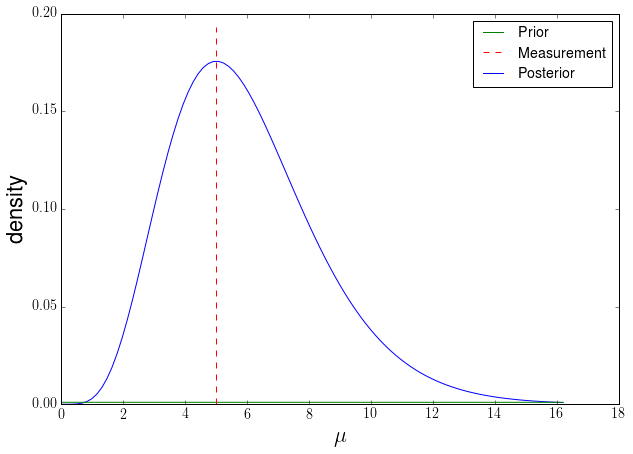

In [2]:
plt.rcParams['figure.figsize'] = (10.0,7.0)
# returns alpha,beta describing the posterior
bayesDemo(alpha0=1.0, beta0=0.001, N=5, showLikelihood=False)

### Bayes theorem as a model for accumulating information

$P(\mathrm{params}|\mathrm{data}) = \frac{P(\mathrm{data}|\mathrm{params})~P(\mathrm{params})}{P(\mathrm{data})}$
* Within this formalism, today's posterior becomes tomorrow's prior seamlessly.

Assuming independent measurements, $P(\theta|x_1,x_2) \propto P(x_2|\theta)P(x_1|\theta)P(\theta) = P(x_2|\theta)P(\theta|x_1)$
* We can try this out with the demo on the previous slide.

## Exercise: categorizing galaxy clusters

X-ray imaging data for 361 galaxy clusters were analyzed, and 57 of them were found to be morphologically "relaxed" according to some metric (arxiv:[1502.06020](https://arxiv.org/abs/1502.06020)). We want to constrain the fraction of relaxed clusters in the Universe (the probability that a randomly chosen cluster is relaxed), $f$, assuming that the data set is representative.

1. What sampling distribution is associated with this type of categorical data?
2. What prior distribution is nicely conjugate to it? (Look this up.) Choose hyperparmeters corresponding to a broadly reasonable prior (e.g. uniform).
3. Sketch a PGM for this experiment.
4. Prove the conjugacy relation for the sampling and prior distributions above. (You do not need to do any integrals.)
5. Write down the posterior for $f$. What is the most probably value for $f$? (You can consult a reference for the mode of the appropriate distribution.)

## Choosing a prior

The prior distribution encodes "what we know before doing the experiment at hand".
* Things are straightforward if we have prior knowledge from e.g. previous measurements or trustworthy simulations, and don't mind including it in our analysis.
* Otherwise, one generally assigns an "uninformative" prior.
* But note that **no distribution is truly devoid of information**.

### "Uninformative" priors

Common choices are
* Uniform
* Uniform in the log (i.e. in the order of magnitude)
* The [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior) for a given problem, which has minimal the Fisher information
* Priors with [maximal entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution) for a given problem

The last 2 are not seen as often in astrophysics, but are worth reading up on.

### Choosing priors

* Again, **there is no genuinely uninformative option**. At best, we can make a minimally informative and defensible choice that doesn't significantly influence the result.
* If the data are so inadequate that out choice of prior really matters, our job as analysts is to clearly state/defend our assumptions and their influence on the results.

## Summarizing posterior distributions

The posterior for model parameters may be "the answer" to an inference problem, but we often want a summary of the form $\theta = \theta_0 \pm \Delta\theta$.
* This is interpreted as a statement about the *marginal* posterior of $\theta$, namely that $\theta$ is in the given **credible interval** with some (specified) probability.
* Note that credible intervals are technically different from the confidence intervals that appear in non-Bayesian statistics, but in practice the terms are often used interchangeably.

### Summarizing posterior distributions
There are several conventions in use for how to come up with an estimate and credible interval:
* Most-probable value and interval (most intuitive)
* Median and symmetric percentiles (simple)
* Mean and symmetric interval (huh?)

And some things you probably shouldn't do (valid only in certain limits)
* Mean and standard deviation
* Intervals from differences in log-likelihood (or log-posterior)

### Summarizing posterior distributions
1 . Most-probable value and interval

<table>
    <tr>
        <td><img src="../graphics/bayes_ci_maxp.png" width=100%></td>
    </tr>
</table>

### Summarizing posterior distributions
2 . Median and symmetric percentiles

<table>
    <tr>
        <td><img src="../graphics/bayes_ci_perc.png" width=100%></td>
    </tr>
</table>

### Summarizing posterior distributions
3 . Mean and symmetric interval

<table>
    <tr>
        <td><img src="../graphics/bayes_ci_mean.png" width=100%></td>
    </tr>
</table>

### Summarizing posterior distributions
Joint constraints (contours) for multiple parameters work the same way, although here only approach 1 really makes sense/is in wide use.

<table>
    <tr>
        <td><img src="../graphics/straightline_2d_post.png" width=100%></td>
    </tr>
</table>

### Summarizing posterior distributions
Another nice feature of the maximum-probability convention is that there is no artificial distinction between quoting a *constraint* and a *limit*.

<table>
    <tr>
        <td><img src="../graphics/bayes_ci_limit.png" width=100%></td>
    </tr>
</table>

## Everything in this course is an inference

We've focussed on one task so far, but this framework applies any time we want to draw a conclusion from data.
* constraining model parameters
* choosing between model frameworks
* source detection
* interpolation and extrapolation
* ...

## Bonus numerical exercise: conjugate distributions

Adapt the code in [bayes_theorem.py](../code/bayes_theorem.py) and above for the "flux of a source" demo to produce an equivalent demo for the "relaxed galaxy cluster" example. It should take as input the prior hyperparameters and data (number of relaxed clusters and total number of clusters), produce plots of the prior and posterior (optionally also the likelihood), and return the parameters describing the posterior distribution.

## Bonus numerical exercise: independent monte carlo

So far, we've used examples where the posterior is a standard distribution. In general this is not the case, and we resort to methods which produce **samples** from the posterior in order to estimate its density and/or integrate it (e.g. to marginalize some parameters). Sampling can be useful even in simple cases, especially for downstream propagation of uncertainties. This exercise will get you some practice working with `scipy`, and introduce the simplest possible sampling method.

For either the Poisson or Binomial examples above, make up some reasonable data and generate $10^4$ samples from the posterior distribution. Then do some post-processing:
1. For the Poisson experiment, convert the posterior for $\mu$ (average number of counts) into something akin to magnitude. Simplifying away things like the reference, integration time and collecting area, use the formula $m=1-2.5\log_{10}(\mu/50)$.
2. For the Binomial experiment, *predict* the number of relaxed clusters found in a hypothetical much larger sample (say 5000 clusters in total). That is, generate a Poisson sample from each of the samples of $\mu$ corresponding to the larger sample size.

Visualize the distributions for these derived parameters by plotting histograms of the samples.

## Bonus numerical exercise: confidence intervals

Write a function for determining the maximum-probability best fit and 1-dimensional confidence interval at a given level from an array of samples. (You can also write one that takes a posterior function as input instead of samples, but in the future we'll be using samples a lot.) Note that some kind of intelligent smoothing or kernel density estimation is generally needed to suppress numerical noise in histograms. Feel free to do the same for the percentile-based confidence intervals described above.

MegaBonus: Write a function for generating 2-dimensional confidence contours the same way. (Note that the `corner` package provides a nifty way to do this already.)